In [106]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from numpy.typing import NDArray

In [ ]:
def get_jpeg2000_different_sizes(png_image: Image,qualities: NDArray )-> NDArray:
    jpeg2000_sizes = []
    for quality in qualities:
        png_image.save('2000.jp2',format="JPEG2000",quality_mode = 'rates',quality_layers = [quality])
        # test_jpeg2000_img = Image.open('2000.jp2')
        jpeg2000_size = os.path.getsize('2000.jp2')/1000
        jpeg2000_sizes.append(jpeg2000_size)
    return np.asarray(jpeg2000_sizes)

def plot_comparison(jpeg2000_sizes:NDArray,qualities: NDArray):
    fig, ax = plt.subplots()
    ax.plot(1/qualities,np.divide(jpeg2000_sizes,png_size))
    ax.plot(np.asarray(range(0,4))/10,1.515151*np.asarray(range(0,4))/10,c='r')
    return fig, ax

In [99]:
png_image_name = 10
png_image_path = f"./cropped_images/{png_image_name}.png"

In [100]:
png_img = Image.open(png_image_path)
png_size = os.path.getsize(png_image_path)/1000

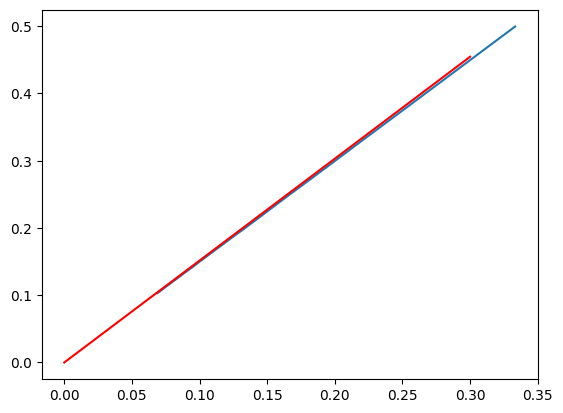

In [102]:
qualities = np.asarray(list(range(30,150,5)))/10

jpeg2000_sizes = get_jpeg2000_different_sizes(png_img,qualities)
fig, ax = plot_comparison(jpeg2000_sizes,qualities)
plt.show()


###  almost linear relationship !!!
### originianl_png_size / jpeg2000_compressed ~= (0.65 or 0.66) * quality_layer_value
### 1 / 0.66 = 1.51515151 again almost perfect relation ship
### JPEG_2000_file_size = ( PNG_file_size * 1.515151 ) / (layer_quality) 
### For the above approximation to hold, layer quality must be larger than 3.

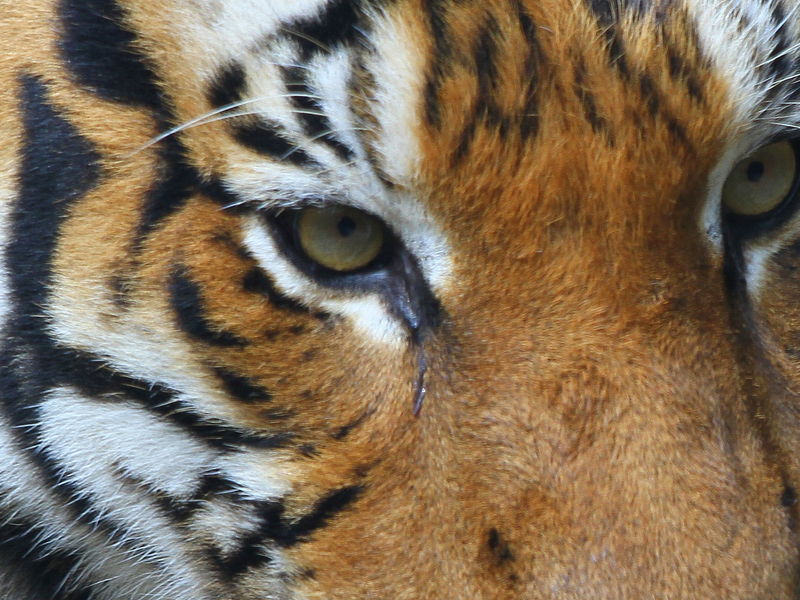